In [39]:
import pandas as pd
import os
import numpy as np

In [40]:
def load_txtdata(path):
    gross_data=np.loadtxt(path)
    np.random.shuffle(gross_data)
    train_data=[]
    train_label=[]
    for item in gross_data:
        train_data.append(np.asarray(item[0:-10]))
        train_label.append(item[-10:])
    return train_data,train_label 

In [41]:
data,labels=load_txtdata(".\semeion.data")

In [43]:
#useless
def load_data(path):
    gross_data=[]
    with open(path,'rb') as f:
        for line in f.readlines():
            line=str(line,encoding='utf-8')
            data1=line.strip('\n')
            data1=data1.strip('\r')
            data2=data1.split(' ')
            for data in data2:
                data=float(data)
            line=np.asarray(data2, dtype=np.float32)
            gross_data.append(line)
        f.close()
    train_data=[]
    train_label=[]
    np.random.shuffle(gross_data)
    for item in gross_data:
        train_data.append(np.asarray(item[0:-11]))
        train_label.append(item[-11:])

    return train_data,train_label    

In [44]:
batch_size=int(0.1*len(data))

In [45]:
print(labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [46]:
def calculate_distance(num,target): #Manhannton
    return np.sum(np.abs(num-target))

In [47]:
def make_dataset(num):
    if num+batch_size<len(data)-1:
        lis=np.arange(num)
        collected=np.arange(num+batch_size,len(data)-1)
        lis=np.append(lis,collected)
    else:
        lis=np.arange(num)
    train_set=[]
    test_set=[]
    test_label=[]
    train_label=[]
    for number in lis:
        train_set.append(data[number])
        train_label.append(labels[number])
    for i in np.arange(num,min(num+batch_size,len(data)-1)):
        test_label.append(labels[i])
        test_set.append(data[i])
    write_data(train_set, train_label,test_set,test_label)
    return train_set, train_label,test_set,test_label

In [48]:
def write_data(train_set, train_label,test_set,test_label):
    if os.path.exists('train_data.txt'):
        None
    else:
        np.savetxt('train_data_set.txt',train_set)
        np.savetxt('test_data_set.txt',test_set)
        np.savetxt('train_label_set.txt',train_label)
        np.savetxt('test_label_set.txt',test_label)

In [49]:
def getnumber(array):
    for item in np.arange(len(array)):
        if array[item]==1:
            return item

In [50]:
from collections import Counter
import pandas as pd
def knn(input_num, dataSet,labelset, k):
    store ={}
    for num_set in range(len(dataSet)):
        dist=calculate_distance(input_num,dataSet[num_set])
        store[num_set]=dist
    dict1=sorted(store.items(),key=lambda x:x[1])
    dict2=dict1[0:k]
    vote=[num[0] for num in dict2]

    voted=[]
    for i in vote:
        c=getnumber(labelset[i])
        voted.append(c)
    maxlable=max(voted,key=voted.count)
    return maxlable

[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


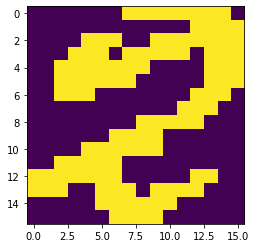

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_pic(array):
    img=array.reshape((16,16))
    print(img)
    imgplot = plt.imshow(img)
show_pic(data[10])
print(labels[10])

In [53]:
def train_test(num,K):
    train_set, train_label,test_set,test_label=make_dataset(num)
    times=0
    accuracy=0
    for i in np.arange(num,min(num+batch_size,len(data)-1)):
      predicted=knn(data[i],train_set,train_label,20)
      labeled=getnumber(labels[i])
      times=times+1
      if(labeled==predicted):
        accuracy=accuracy+1
    return accuracy/times 

In [60]:
config=[1,2,3,5,8,10,20]
average=[]
for item in config:
    average.append
    sum_k=0
    for i in range(5):
        sum_k=sum_k+train_test(np.random.randint(len(data)),item)
    sum_k=sum_k/5
    average.append(sum_k)
print(average)

[0.8955974842767297, 0.89937106918239, 0.8968553459119498, 0.889308176100629, 0.913978494623656, 0.8981132075471698, 0.9018867924528303]


In [63]:
from sklearn.neighbors import KNeighborsClassifier
train_set, train_label,test_set,test_label=make_dataset(np.random.randint(len(data)))
statistic=[]
for K in config:
    neigh = KNeighborsClassifier(n_neighbors=K)
    reset_set,conv_test=[],[]
    for item in train_label:
        reset_set.append(getnumber(item))
    for item in test_label:
        conv_test.append(getnumber(item))
    neigh.fit(train_set, reset_set)
    acc=0
    predicted=neigh.predict(test_set)
    for item in range(len(predicted)):
        if predicted[item]==conv_test[item]:
            acc=acc+1
    statistic.append(acc/len(predicted))
print(statistic)


    

[0.9119496855345912, 0.8490566037735849, 0.8930817610062893, 0.8805031446540881, 0.8930817610062893, 0.89937106918239, 0.8867924528301887]


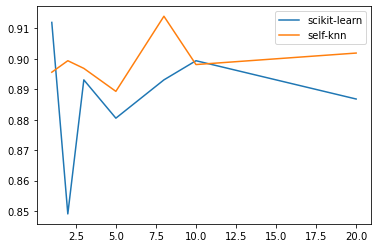

In [65]:
import matplotlib.pyplot as plt
plt.plot(config,statistic,label='scikit-learn')
plt.plot(config,average,label='self-knn')
plt.legend(['scikit-learn','self-knn'])